
**Oppgave**

*Gjør oppgavene fra [Core Project 7](https://www.core-econ.org/doing-economics/book/text/07-01.html#introduction). Her møter du igjen Suit sin modell for tilbud av og etterspørsel etter vannmeloner. Se foreløpig bort fra oppgave 3c i delkap 7.1 (overskuddsbetraktninger kommer vi tilbake til i kap 9). Her lærer du noe mer om hvordan man fremstiller tilbud og etterspørsel basert på faktisk data, tolkning av empiriske resultater, og hvordan man modellerer skift i kurvene.*       

*R-koden et gitt i gjennomgangen av oppgaven. Løs oppgavene ved hjelp av Python.*  

*Med følgende kode kan du laste ned dataene som brukes i denne oppgaven.*    


In [14]:
import sympy as sp
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import sympy.solvers as solve
import math

In [15]:
df=pd.read_csv("https://uit-sok-1006-v23.github.io/data/suits_watermelons.csv",delimiter=";")


In [16]:
df

,Year,log q,log h,log p,log p_c,log p_v,log w,log n,log(y/n),log p_f
0,1930,4.448623,4.379545,4.761777,2.247338,0.845054,3.366401,4.812434,6.403531,2.535163
1,1931,4.356519,4.333493,4.614410,1.733858,2.726278,3.136141,4.819342,6.244651,2.546676
2,1932,4.204548,4.054879,4.368032,1.874316,2.588122,2.832198,4.826250,5.966037,2.599635
3,1933,4.031853,4.008827,4.531517,2.318718,2.286482,2.772330,4.833157,5.896959,2.645687
4,1934,4.096325,4.094023,4.644344,2.514439,1.475967,2.917394,4.840065,6.018996,2.624964
5,1935,4.195337,4.156193,4.563753,2.406217,1.892737,2.970354,4.844670,6.129521,2.710160
6,1936,4.135470,4.128562,4.851578,2.514439,1.897342,2.995683,4.853881,6.246954,2.703252
7,1937,4.262113,4.225271,4.662765,2.129905,2.079248,3.113115,4.858486,6.311427,2.705555
8,1938,4.259810,4.202245,4.690396,2.150628,3.044037,3.090089,4.865394,6.226230,2.753910
9,1939,4.144680,4.137772,4.777895,2.208193,1.701621,3.113115,4.874604,6.288401,2.691739


7.1

In [17]:
#Oppgave 1 a

df1 = df
df1["Q"]=df1["log q"]
df1["Q"]=np.exp(df1["Q"])
df1["P"]=df1["log p"]
df1["P"]=np.exp(df1["P"])
df1

,Year,log q,log h,log p,log p_c,log p_v,log w,log n,log(y/n),log p_f,Q,P
0,1930,4.448623,4.379545,4.761777,2.247338,0.845054,3.366401,4.812434,6.403531,2.535163,85.509134,116.953544
1,1931,4.356519,4.333493,4.614410,1.733858,2.726278,3.136141,4.819342,6.244651,2.546676,77.985211,100.928304
2,1932,4.204548,4.054879,4.368032,1.874316,2.588122,2.832198,4.826250,5.966037,2.599635,66.990284,78.888243
3,1933,4.031853,4.008827,4.531517,2.318718,2.286482,2.772330,4.833157,5.896959,2.645687,56.365237,92.899364
4,1934,4.096325,4.094023,4.644344,2.514439,1.475967,2.917394,4.840065,6.018996,2.624964,60.118968,103.995143
5,1935,4.195337,4.156193,4.563753,2.406217,1.892737,2.970354,4.844670,6.129521,2.710160,66.376110,95.942898
6,1936,4.135470,4.128562,4.851578,2.514439,1.897342,2.995683,4.853881,6.246954,2.703252,62.518943,127.942149
7,1937,4.262113,4.225271,4.662765,2.129905,2.079248,3.113115,4.858486,6.311427,2.705555,70.959735,105.928570
8,1938,4.259810,4.202245,4.690396,2.150628,3.044037,3.090089,4.865394,6.226230,2.753910,70.796531,108.896316
9,1939,4.144680,4.137772,4.777895,2.208193,1.701621,3.113115,4.874604,6.288401,2.691739,63.097427,118.853899


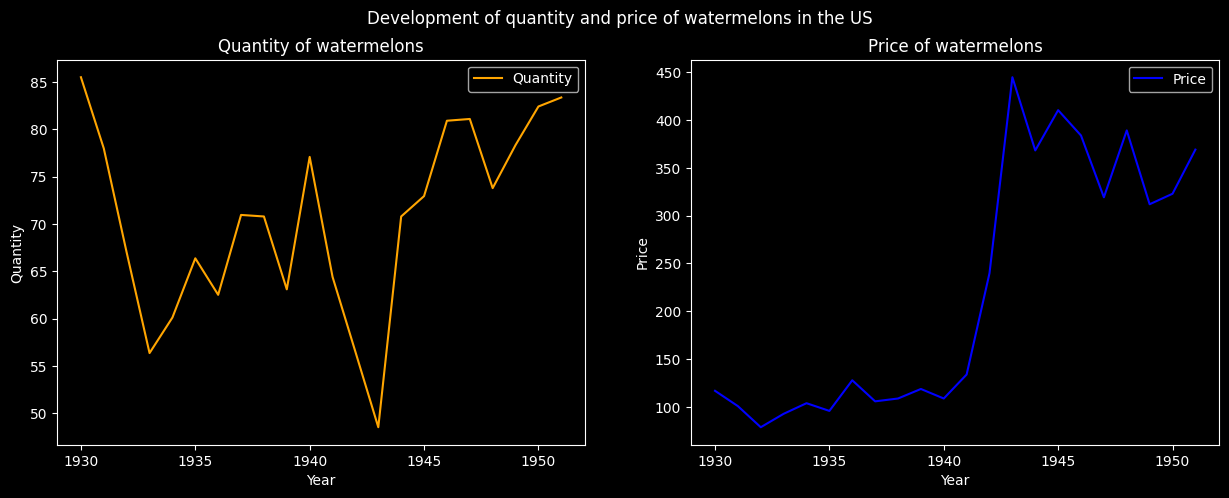

In [18]:
#oppgave 1b
plt.style.use("dark_background")
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))
ax1.plot(df1["Year"],df1["Q"], color="orange",label='Quantity')
ax2.plot(df1["Year"],df1["P"], color="blue",label='Price')
ax1.set_title('Quantity of watermelons')
ax2.set_title('Price of watermelons')
ax1.set_ylabel('Quantity')
ax2.set_ylabel('Price')
ax1.set_xlabel('Year')
ax2.set_xlabel('Year')
fig.suptitle('Development of quantity and price of watermelons in the US')
ax1.legend()
ax2.legend()

In [19]:
#Oppgave 2 a, b og c
x1=np.arange(20,105,5)
x2=np.log(x1)
data= {"Q (i millioner)":x1,"log Q": x2}
df2=pd.DataFrame(data)

x3=-2 +1.7*(df2["log Q"])
x4=8.5-0.82*(df2["log Q"])
df2["supply log P"]=x3
df2["demand log P"]=x4
df2["supply P"]=np.exp(x3)
df2["demand P"]=np.exp(x4)
df2


,Q (i millioner),log Q,supply log P,demand log P,supply P,demand P
0,20,2.995732,3.092745,6.043500,22.037485,421.365040
1,25,3.218876,3.472089,5.860522,32.203943,350.907208
2,30,3.401197,3.782036,5.711018,43.905322,302.178574
3,35,3.555348,4.044092,5.584615,57.059336,266.297629
4,40,3.688879,4.271095,5.475119,71.600000,238.678832
5,45,3.806662,4.471326,5.378537,87.472655,216.704952
6,50,3.912023,4.650439,5.292141,104.630920,198.768561
7,55,4.007333,4.812466,5.213987,123.034698,183.825472
8,60,4.094345,4.960386,5.142637,142.648813,171.166618
9,65,4.174387,5.096458,5.077002,163.442028,160.292847


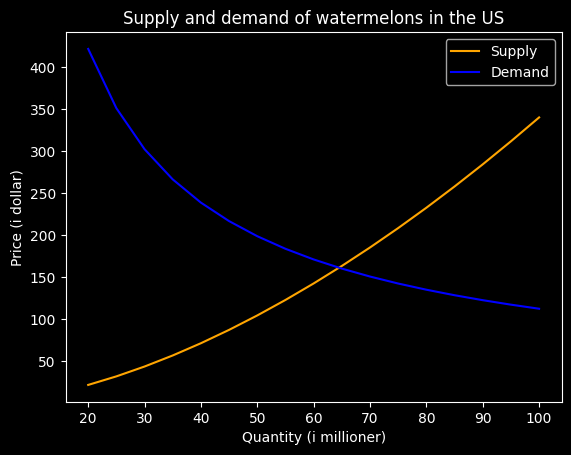

In [20]:
#oppgave 2 d
plt.style.use("dark_background")
fig, ax = plt.subplots()
ax.plot(df2["Q (i millioner)"],df2["supply P"], color="orange",label='Supply')
ax.set_xlabel("Quantity (i millioner)")
ax.set_ylabel("Price (i dollar)")
ax.plot(df2["Q (i millioner)"],df2["demand P"], color="blue",label='Demand')
ax.legend()
ax.set_title("Supply and demand of watermelons in the US")
plt.show()


In [21]:
#oppgave 3 a 
x5=-2.0+1.7*df2["log Q"]+0.4
df2["New supply log P"]=x5
df2["New supply P"]=np.exp(x5)
df2

,Q (i millioner),log Q,supply log P,demand log P,supply P,demand P,New supply log P,New supply P
0,20,2.995732,3.092745,6.043500,22.037485,421.365040,3.492745,32.876064
1,25,3.218876,3.472089,5.860522,32.203943,350.907208,3.872089,48.042638
2,30,3.401197,3.782036,5.711018,43.905322,302.178574,4.182036,65.499044
3,35,3.555348,4.044092,5.584615,57.059336,266.297629,4.444092,85.122526
4,40,3.688879,4.271095,5.475119,71.600000,238.678832,4.671095,106.814648
5,45,3.806662,4.471326,5.378537,87.472655,216.704952,4.871326,130.493867
6,50,3.912023,4.650439,5.292141,104.630920,198.768561,5.050439,156.090990
7,55,4.007333,4.812466,5.213987,123.034698,183.825472,5.212466,183.546201
8,60,4.094345,4.960386,5.142637,142.648813,171.166618,5.360386,212.807022
9,65,4.174387,5.096458,5.077002,163.442028,160.292847,5.496458,243.826854


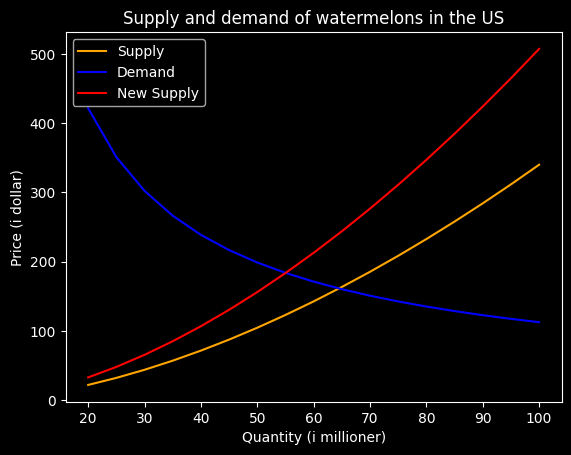

In [22]:
#oppgave 3 b
plt.style.use("dark_background")
fig, ax = plt.subplots()
ax.plot(df2["Q (i millioner)"],df2["supply P"], color="orange",label='Supply')
ax.set_xlabel("Quantity (i millioner)")
ax.set_ylabel("Price (i dollar)")
ax.plot(df2["Q (i millioner)"],df2["demand P"], color="blue",label='Demand')
ax.plot(df2["Q (i millioner)"],df2["New supply P"], color="red", label="New Supply")
ax.legend()
ax.set_title("Supply and demand of watermelons in the US")
plt.show()

7.2

In [23]:
#Oppgave 1 a
logp, logq=sp.symbols("logp logq")
eq=sp.Eq(-2.0+1.7*logq, logp)
sp.solve(eq, logq)

[0.588235294117647*logp + 1.17647058823529]

In [24]:
print(-(0.588235294117647/1)) #priselastisiteten er omtrent -0.59, altså er tilbudet elastisk

-0.588235294117647


In [25]:
#Oppgave 1 b
eq1=sp.Eq(8.5+0.82*logq, logp)
sp.solve(eq1, logq)

[1.21951219512195*logp - 10.3658536585366]

In [26]:
print(-(1.21951219512195)/1) #priselastisiteten er omtrent -1.22, altså er etterspørselen uelastisk

-1.21951219512195


Oppgave 2

Estimatene i tilbudslikningen forteller oss at hvis prisen øker med 1%, faller kvantum solgt med 0.59%

Oppgave 3

Estimatene i etterspørselslikningen forteller oss at hvis prisen øker med 1%, faller etterspørselen med 1.22%

Opppgave 4


Eksempler på tilbud- og etterspørselssjokk kan være krig, pandemi og nedstenging og naturkatastofer 